In [37]:
# Neural Networks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

MNIST 데이터 불러오기

In [38]:
num_classes = 10
input_shape =(28, 28, 1)
# 28 * 28 (pixel), 1 channel (흑백)

In [39]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
x_train.shape
# 60000 장 이미지, 28*28

(60000, 28, 28)

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
y_train.shape

(60000,)

In [43]:
y_train[1]

0

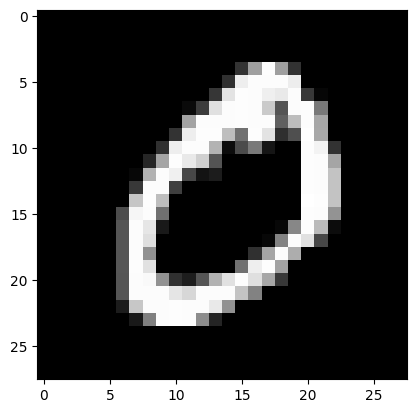

In [44]:
# 데이터를 이미지로 표현하기
plt.imshow(x_train[1].reshape(28,28))
plt.gray()
plt.show()

In [45]:
# 이미지 scailing 0~255 >> 0~1

x_train = x_train.astype('float32') / 255
# 정수 > 실수
x_test = x_test.astype('float32') / 255

In [46]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
# 이미지를 (28,28,1) 모양으로 변환
x_train = np.expand_dims(x_train, -1)

In [49]:
x_test = np.expand_dims(x_test, -1)

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
x_test.shape

(10000, 28, 28, 1)

In [52]:
x_train.shape[0]

60000

In [53]:
x_test.shape[0]

10000

In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [55]:
# one-hot encoding 변환 to_categorical() 함수
# 예) 0 -> [1,0,0,0,0,0,0,0,0,0]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [56]:
y_train.shape

(60000, 10)

In [75]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [78]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [79]:
y_test.shape

(10000, 10)

모델생성

In [58]:
model = keras.Sequential(
        [   # 특징 추출 (feature extraction)
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2,2)),
            layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D(pool_size=(2,2)),

            # 2차원 >> 1차원
            layers.Flatten(),
            layers.Dense(num_classes, activation='softmax')


        ]

)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [70]:
'''
입력 크기 : (28,28,1) 28*28 이미지 channel 1(흑백)
필터(kernel) :(3,3)

conv2d_1 (Conv2D)
필터 수 32개
3*3*1(흑백) = 9
필터 개수 32
9 * 32 + 32(bias) = 320

conv2d_2 (Conv2D)
입력크기 (13,13,32)
각 필터 파라미터 3*3*32 = 288
필터 수 64개

288 * 64 + 64 = 18496


flatten (Flatten) : 2차원 >> 1차원
입력크기 (5, 5, 64)
5 * 5 * 64 = 1600

dense (Dense)
분류 클래스 10개

입력크기 1600
출력크기 10

1600 * 10 = 16000
16000 + 10(bias) = 16010

총 파라미터수
320 + 18496 +  16010 = 34826
'''

'\n입력 크기 : (28,28,1) 28*28 이미지 channel 1(흑백)\n필터(kernel) :(3,3) \n\nconv2d_1 (Conv2D) \n필터 수 32개\n3*3*1(흑백) = 9\n필터 개수 32 \n9 * 32 + 32(bias) = 320 \n\nconv2d_2 (Conv2D) \n입력크기 (13,13,32)\n각 필터 파라미터 3*3*32 = 288\n필터 수 64개\n\n288 * 64 + 64 = 18496\n\n\nflatten (Flatten) : 2차원 >> 1차원 \n입력크기 (5, 5, 64) \n5 * 5 * 64 = 1600\n\ndense (Dense) \n분류 클래스 10개 \n\n입력크기 1600\n출력크기 10\n\n1600 * 10 = 16000 \n16000 + 10(bias) = 16010\n\n총 파라미터수 \n320 + 18496 +  16010 = 34826\n'

In [72]:
# mini-batch size
# 한번 weight 업데이트 하기 위해 필요한 데이터 양
batch_size = 128

# epoch 에폭 (학습과정에서 전체 데이터 사용 횟수) 반복
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습(training, fitting)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split= 0.1)



Epoch 1/15
422/422 [==============================] - 44s 102ms/step - loss: 0.2825 - accuracy: 0.9229 - val_loss: 0.0814 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0791 - accuracy: 0.9761 - val_loss: 0.0577 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0566 - val_accuracy: 0.9830
Epoch 4/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0478 - val_accuracy: 0.9868
Epoch 6/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0408 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0428 - val_accu

학습결과 확인

In [80]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.031091542914509773
Test accuracy: 0.9894000291824341
